# The hard-concrete distribution 

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import math

In [3]:
in_features = 1
limit_a, limit_b, epsilon = -.1, 1.1, 1e-6
droprate_init = 0.5
logalpha = Parameter(torch.Tensor(in_features))
logalpha.data.normal_(math.log(1 - droprate_init) - math.log(droprate_init), 1e-2)
print(logalpha)
beta = 2./3.

def quantile_concrete(x):
    """Implements the quantile, aka inverse CDF, of the 'stretched' concrete distribution"""
    y = torch.sigmoid((torch.log(x) - torch.log(1 - x) + logalpha) / beta)
    return y * (limit_b - limit_a) + limit_a

def get_eps(size):
    """Uniform random numbers for the concrete distribution"""
    eps = torch.FloatTensor(size).uniform_(epsilon, 1-epsilon)
    eps = Variable(eps)
    return eps

def sample_z(batch_size, sample=True):
    """Sample the hard-concrete gates for training and use a deterministic value for testing"""
    if sample:
        eps = get_eps(torch.FloatTensor(batch_size, in_features))
        z = quantile_concrete(eps)
        return F.hardtanh(z, min_val=0, max_val=1)
    else:  # mode
        pi = F.sigmoid(logalpha).view(1, in_features).expand(batch_size, in_features)
        return F.hardtanh(pi * (limit_b - limit_a) + limit_a, min_val=0, max_val=1)

Parameter containing:
tensor([0.0041], requires_grad=True)


In [4]:
z = sample_z(1, sample=True)
print(z)

tensor([[0.1225]], grad_fn=<HardtanhBackward0>)


tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900, 1.0000])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000,

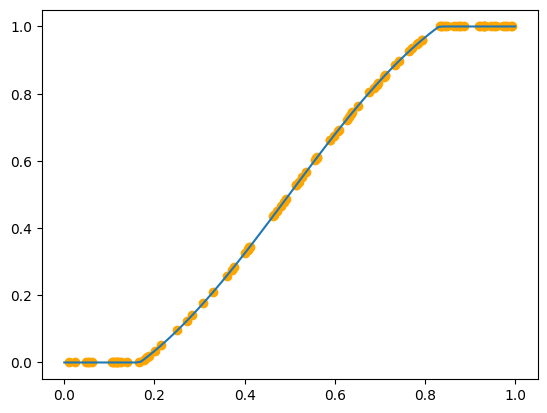

In [7]:
sweep = torch.arange(0, 1.01, step=0.01)
print(sweep)
eps = get_eps(size=100)

dist = quantile_concrete(sweep)
dist = F.hardtanh(dist, min_val=0, max_val=1)

dist_eps = quantile_concrete(eps)
dist_eps = F.hardtanh(dist_eps, min_val=0, max_val=1)

print(dist)
plt.plot(sweep.detach().numpy(), dist.detach().numpy())
plt.scatter(eps.detach().numpy(), dist_eps.detach().numpy(), color='orange')